# Initialize

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
classifier("I love this!")

[[{'label': 'anger', 'score': 0.004419787786900997},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.0004138524236623198},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'surprise', 'score': 0.008528684265911579}]]

In [ ]:
from transformers import pipeline, AutoTokenizer

def chunk_text(text, max_chunk_size, overlap_size):
    tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
    tokens = tokenizer.tokenize(text)
    chunks = []
    start_idx = 0
    while start_idx < len(tokens):
        end_idx = min(start_idx + max_chunk_size, len(tokens))
        chunks.append(tokens[start_idx:end_idx])
        start_idx += max_chunk_size - overlap_size
    return chunks

def average_sentiment(text, max_chunk_size=256, overlap_size=50):
    tokenizer = AutoTokenizer.from_pretrained("j-hartmann/emotion-english-distilroberta-base")
    chunks = chunk_text(text, max_chunk_size, overlap_size)
    classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
    total_scores = [0] * 7  # Initialize total scores for each sentiment category
    num_chunks = len(chunks)
    for chunk in chunks:
        chunk_text_str = tokenizer.convert_tokens_to_string(chunk)
        scores = classifier(chunk_text_str)
        for i, score in enumerate(scores[0]):
            total_scores[i] += score['score']
    average_scores = [score / num_chunks for score in total_scores]
    return average_scores

In [ ]:
def process_text_input(multiline_text):
    # Split the multiline text into lines
    lines = multiline_text.split('\n')
    # Join the lines into a single string with spaces between them
    single_line_text = ' '.join(lines)
    return single_line_text

# Short Lyrics

## Choose  Short Lyrics

In [ ]:
# Mixed Feelings

# Usage:
multiline_input = """[Verse 1]
Walking through the rain, tears in my eyes
Every drop reminds me of our goodbyes
But in the storm, I find a glimmer of light
A fleeting hope that everything will be alright

[Chorus]
One moment I'm dancing in the moonlight
Feeling free, my spirit taking flight
But then the shadows creep, and I'm filled with fear
Lost in the darkness, wishing you were near

[Verse 2]
Memories of laughter, echoes in my mind
But they're drowned out by the pain, so unkind
I reach for the stars, but they slip through my grasp
Caught between the future and the past

[Chorus]
One moment I'm dancing in the moonlight
Feeling free, my spirit taking flight
But then the shadows creep, and I'm filled with fear
Lost in the darkness, wishing you were near

[Bridge]
In the chaos of emotions, I find my way
A delicate balance, night and day
I embrace the contradictions, the highs and lows
For in the depths of despair, a seed of hope grows

[Chorus]
One moment I'm dancing in the moonlight
Feeling free, my spirit taking flight
But then the shadows creep, and I'm filled with fear
Lost in the darkness, wishing you were near

[Outro]
Through the tears and the laughter, I'll hold on tight
Navigating this journey, with all its might
For in the mix of emotions, I'll find my truth
And in the end, love will be my proof
"""
lyrics = process_text_input(multiline_input)
print(lyrics)


[Verse 1] Walking through the rain, tears in my eyes Every drop reminds me of our goodbyes But in the storm, I find a glimmer of light A fleeting hope that everything will be alright  [Chorus] One moment I'm dancing in the moonlight Feeling free, my spirit taking flight But then the shadows creep, and I'm filled with fear Lost in the darkness, wishing you were near  [Verse 2] Memories of laughter, echoes in my mind But they're drowned out by the pain, so unkind I reach for the stars, but they slip through my grasp Caught between the future and the past  [Chorus] One moment I'm dancing in the moonlight Feeling free, my spirit taking flight But then the shadows creep, and I'm filled with fear Lost in the darkness, wishing you were near  [Bridge] In the chaos of emotions, I find my way A delicate balance, night and day I embrace the contradictions, the highs and lows For in the depths of despair, a seed of hope grows  [Chorus] One moment I'm dancing in the moonlight Feeling free, my spiri

In [ ]:

# All Anger

# Usage:
multiline_input = """Verse 1:
Rage boiling inside, can't contain the fire,
Heart pounding loud, like a raging choir.
Every word you said, like a dagger to the chest,
Fueling up my fury, I won't let this rest.

Chorus:
Anger burning bright, in the dead of night,
Screaming out my pain, gonna start a fight.
Fists clenched tight, ready for the brawl,
Anger's gonna break me, gonna make me fall.

Verse 2:
Eyes turning red, vision clouded with hate,
Can't control the fury, it's just too late.
Every slight and insult, carved into my soul,
Wrath consuming me, losing all control.

Chorus:
Anger burning bright, in the dead of night,
Screaming out my pain, gonna start a fight.
Fists clenched tight, ready for the brawl,
Anger's gonna break me, gonna make me fall.

Bridge:
Burning bridges behind me, leaving ashes in my wake,
No turning back now, it's too much at stake.
Anger's my companion, my constant loyal friend,
But in the end, it's me I'll condemn.

Chorus:
Anger burning bright, in the dead of night,
Screaming out my pain, gonna start a fight.
Fists clenched tight, ready for the brawl,
Anger's gonna break me, gonna make me fall.
"""
lyrics = process_text_input(multiline_input)
print(lyrics)


Verse 1: Rage boiling inside, can't contain the fire, Heart pounding loud, like a raging choir. Every word you said, like a dagger to the chest, Fueling up my fury, I won't let this rest.  Chorus: Anger burning bright, in the dead of night, Screaming out my pain, gonna start a fight. Fists clenched tight, ready for the brawl, Anger's gonna break me, gonna make me fall.  Verse 2: Eyes turning red, vision clouded with hate, Can't control the fury, it's just too late. Every slight and insult, carved into my soul, Wrath consuming me, losing all control.  Chorus: Anger burning bright, in the dead of night, Screaming out my pain, gonna start a fight. Fists clenched tight, ready for the brawl, Anger's gonna break me, gonna make me fall.  Bridge: Burning bridges behind me, leaving ashes in my wake, No turning back now, it's too much at stake. Anger's my companion, my constant loyal friend, But in the end, it's me I'll condemn.  Chorus: Anger burning bright, in the dead of night, Screaming out 

In [ ]:
# Usage:
multiline_input = """In the golden glow of twilight,
where the whispers of the wind
intertwine with the melody of the night,
we found solace in each other's embrace,
lost in the rhythm of our beating hearts,
as the world around us faded into a dream."""
lyrics = process_text_input(multiline_input)
print(lyrics)

In the golden glow of twilight, where the whispers of the wind intertwine with the melody of the night, we found solace in each other's embrace, lost in the rhythm of our beating hearts, as the world around us faded into a dream.


In [ ]:
# With Or Without You - U2

# Usage:
multiline_input = """See the stone set in your eyes
See the thorn twist in your side
I'll wait for you
Sleight of hand and twist of fate
On a bed of nails, she makes me wait
And I wait without you
With or without you
With or without you
Through the storm, we reach the shore
You give it all but I want more
And I'm waiting for you
With or without you
With or without you, ah, ah
I can't live
With or without you
And you give yourself away
And you give yourself away
And you give
And you give
And you give yourself away
My hands are tied
My body bruised, she got me with
Nothing to win and
Nothing left to lose
And you give yourself away
And you give yourself away
And you give
And you give
And you give yourself away
With or without you
With or without you, oh
I can't live
With or without you
Oh, oh
Oh, oh
With or without you
With or without you, oh
I can't live
With or without you
With or without you"""
lyrics = process_text_input(multiline_input)
print(lyrics)




See the stone set in your eyes See the thorn twist in your side I'll wait for you Sleight of hand and twist of fate On a bed of nails, she makes me wait And I wait without you With or without you With or without you Through the storm, we reach the shore You give it all but I want more And I'm waiting for you With or without you With or without you, ah, ah I can't live With or without you And you give yourself away And you give yourself away And you give And you give And you give yourself away My hands are tied My body bruised, she got me with Nothing to win and Nothing left to lose And you give yourself away And you give yourself away And you give And you give And you give yourself away With or without you With or without you, oh I can't live With or without you Oh, oh Oh, oh With or without you With or without you, oh I can't live With or without you With or without you


## Analyze Short Lyrics

In [ ]:
sentiment_scores = average_sentiment(lyrics)
print(sentiment_scores)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[0.1890331208705902, 0.07054458558559418, 0.10376916825771332, 0.007688358426094055, 0.10647772252559662, 0.5070633292198181, 0.01542370580136776]


In [ ]:
# Adding all the sentiment scores
total_score = sum(sentiment_scores)

print("Total sentiment score:", total_score)


Total sentiment score: 0.9999999906867743


In [ ]:
# Lyrics Sentiment Analysis Pie Chart

import plotly.graph_objects as go

# Your sentiment scores and labels here

total = sum(sentiment_scores)
sentiment_percentages = [(score / total) * 100 for score in sentiment_scores]

labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']

colors = ['#A102FE', '#ABD700', '#FFCF32', '#FE6C40', '#D3D0D0', '#7CAEFF', '#FF86C3']

fig = go.Figure(data=[go.Pie(labels=labels, values=sentiment_percentages, marker=dict(colors=colors))])
fig.show()



# Joy: #FE6C40
# Sadness: #7CAEFF
# Fear: #FFCF32
# Disgust: #ABD700
# Anger: #A102FE
# Surprise: #FF86C3
# Neutral: #D3D0D0


La siguiente celda tarda 1 minuto en correr.

In [ ]:
from transformers import pipeline, AutoTokenizer
import numpy as np
import string

# Load the classifier and tokenizer
model_name = "j-hartmann/emotion-english-distilroberta-base"
classifier = pipeline("text-classification", model=model_name, return_all_scores=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def word_importance_scores(text, classifier, tokenizer):
    # Tokenize the input text and convert tokens to words
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    words = tokenizer.convert_tokens_to_string(tokens).split()

    # Remove punctuation from words
    words = [word.strip(string.punctuation) for word in words]

    # Get the original sentiment score for comparison
    original_scores = classifier(text)[0]

    # Initialize a dictionary to hold the importance scores for each word
    importance_scores = {}

    # Iterate through each word in the text
    for i, word in enumerate(words):
        if word in tokenizer.all_special_tokens:
            # Skip special tokens
            continue

        # Create a perturbed version of the text by masking the current word
        perturbed_text = " ".join(words[:i] + ["[MASK]"] + words[i+1:])

        # Classify the sentiment of the perturbed text
        perturbed_scores = classifier(perturbed_text)[0]

        # Calculate the difference in sentiment scores
        score_diff = {sentiment['label']: abs(original_score['score'] - sentiment['score'])
                      for original_score, sentiment in zip(original_scores, perturbed_scores)}

        # Store the score difference
        importance_scores[word] = score_diff

    return importance_scores

lyrics

# Calculate the importance scores for each word in the lyrics
importance_scores = word_importance_scores(lyrics, classifier, tokenizer)

# Print the importance scores
for word, scores in importance_scores.items():
    print(f"Word: '{word}', Importance Scores: {scores}")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



Word: 's>See', Importance Scores: {'anger': 0.019384771585464478, 'disgust': 0.03833034634590149, 'fear': 0.03647352010011673, 'joy': 0.0006338413804769516, 'neutral': 0.016134656965732574, 'sadness': 0.07202392816543579, 'surprise': 0.0011040177196264267}
Word: 'the', Importance Scores: {'anger': 0.008893400430679321, 'disgust': 0.041421862319111824, 'fear': 0.02719825506210327, 'joy': 0.0016699619591236115, 'neutral': 0.009238220751285553, 'sadness': 0.08158963918685913, 'surprise': 0.0034921616315841675}
Word: 'stone', Importance Scores: {'anger': 0.03322416543960571, 'disgust': 0.04163379594683647, 'fear': 0.03843765705823898, 'joy': 0.0017050551250576973, 'neutral': 0.002099454402923584, 'sadness': 0.1098790168762207, 'surprise': 0.0038110464811325073}
Word: 'set', Importance Scores: {'anger': 0.03377850353717804, 'disgust': 0.04124811105430126, 'fear': 0.03253864496946335, 'joy': 0.0014162445440888405, 'neutral': 0.0006241798400878906, 'sadness': 0.10287308692932129, 'surprise': 

In [ ]:
# Choose the sentiment for highlighting
chosen_sentiment = 'sadness'  # Change this to the sentiment you want to highlight

In [ ]:
# Word by Word Impact In Lyrics Towards a Chosen Sentiment

from IPython.display import HTML

# Define sentiment-to-color mapping
sentiment_colors = {
    'joy': '#FE6C40',
    'sadness': '#7CAEFF',
    'fear': '#FFCF32',
    'disgust': '#ABD700',
    'anger': '#A102FE',
    'surprise': '#FF86C3',
    'neutral': '#D3D0D0'
}

# Extract scores for the chosen sentiment for each word
chosen_sentiment_scores = {word: float(scores[chosen_sentiment]) for word, scores in importance_scores.items()}

# Get maximum, minimum, and middle values
max_score = max(chosen_sentiment_scores.values())
min_score = min(chosen_sentiment_scores.values())
mid_score = (max_score + min_score) / 2

# Normalize the scores to [0, 1] for color intensity
normalized_scores = {word: (score - min_score) / (max_score - min_score) if max_score != min_score else mid_score for word, score in chosen_sentiment_scores.items()}

# Calculate opacity levels for legend
min_opacity = int(255 * 0.10)
max_opacity = 255
mid_opacity = (max_opacity + min_opacity) // 2

# Generate HTML content for lyrics
html_content = "<div style='font-size:16px;'>"
for word in lyrics.split():
    # Remove punctuation for lookup
    clean_word = word.strip(',.?!\"')
    normalized_score = normalized_scores.get(clean_word, 0)
    # Get the color for the sentiment
    highlight_color = sentiment_colors[chosen_sentiment]
    # Calculate opacity proportionately between min and max
    opacity = int( min_opacity + (normalized_score * (max_opacity - min_opacity)))
    # Ensure opacity is within bounds
    opacity = max(min(opacity, 255), 0)
    # Combine color and opacity
    highlight_color_with_opacity = f"{highlight_color}{opacity:02X}"  # Convert opacity to hexadecimal
    background_style = f"background-color:{highlight_color_with_opacity};"
    # Append the word with the corresponding highlighting
    html_content += f"<span style='{background_style}'>{word} </span>"
html_content += "</div>"

# Generate HTML content for legend
legend_html_content = f"<div style='font-size:14px; margin-top:10px;'>"
legend_html_content += "<span style='margin-right: 10px;'>Minimum value</span>"
legend_html_content += f"<span style='background-color:{sentiment_colors[chosen_sentiment]}{min_opacity:02X};'>{min_score:.6f}</span>"
legend_html_content += "<span style='margin-left: 10px; margin-right: 10px;'>Middle value</span>"
legend_html_content += f"<span style='background-color:{sentiment_colors[chosen_sentiment]}{mid_opacity:02X};'>{mid_score:.6f}</span>"
legend_html_content += "<span style='margin-left: 10px; margin-right: 10px;'>Maximum value</span>"
legend_html_content += f"<span style='background-color:{sentiment_colors[chosen_sentiment]}{max_opacity:02X};'>{max_score:.6f}</span>"
legend_html_content += "</div>"

# Display the colored text and legend
display(HTML(html_content))
display(HTML(legend_html_content))



In [ ]:
# Word-Specific Values

def inspect_word_sentiment(word, chosen_sentiment_scores, normalized_scores, sentiment_colors):
    score = chosen_sentiment_scores.get(word, 0)
    normalized_score = normalized_scores.get(word, 0)
    opacity = int( min_opacity + (normalized_score * (max_opacity - min_opacity)))
    highlight_color = sentiment_colors[chosen_sentiment]
    highlight_color_with_opacity = f"{highlight_color}{opacity:02X}"
    # Generate HTML content to display the word with highlighting color and opacity
    html_content = f"<div style='font-size:16px;'>"
    background_style = f"background-color:{highlight_color_with_opacity};"
    html_content += f"<span style='{background_style}'>{word}</span>"
    html_content += "</div>"
    # Display the HTML content
    display(HTML(html_content))
    print(f"Sentiment Score: {score}")
    print(f"Normalized Score: {normalized_score}")
    print(f"opacity: {opacity}")
    print(f"Highlighting Color: {highlight_color_with_opacity}")

# Example usage:
word_to_inspect = "Wrath"
inspect_word_sentiment(word_to_inspect, chosen_sentiment_scores, normalized_scores, sentiment_colors)



Sentiment Score: 0
Normalized Score: 0
opacity: 25
Highlighting Color: #7CAEFF19


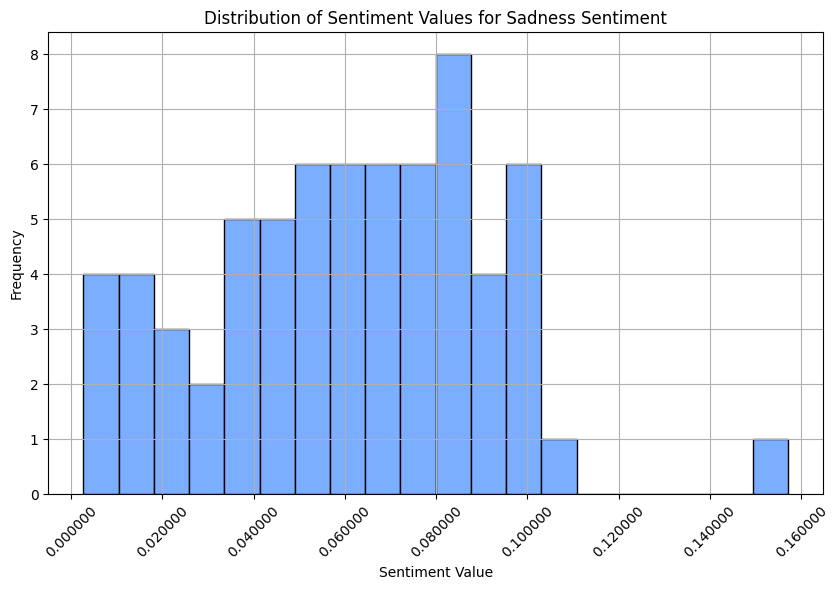

In [ ]:
# Distribution of Sentiment Values for Chosen Sentiment - Matplotlib

import matplotlib.pyplot as plt

# Get the sentiment scores for all words
sentiment_values = [scores[chosen_sentiment] for scores in importance_scores.values()]

# Plot the distribution of sentiment values
plt.figure(figsize=(10, 6))
plt.hist(sentiment_values, bins=20, color=sentiment_colors[chosen_sentiment], edgecolor='black')
plt.title(f'Distribution of Sentiment Values for {chosen_sentiment.capitalize()} Sentiment')
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.grid(True)

# Set the format of tick labels along the X axis to display six decimal places
plt.xticks(fontsize=10, rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.6f'))

plt.show()


In [ ]:
# Distribution of Sentiment Values for Chosen Sentiment - Plotly

import plotly.graph_objects as go

# Get the sentiment scores for all words
sentiment_values = [scores[chosen_sentiment] for scores in importance_scores.values()]

# Create histogram trace with 20 bins
fig = go.Figure(data=[go.Histogram(x=sentiment_values, nbinsx=20, marker_color=sentiment_colors[chosen_sentiment])])

# Update layout
fig.update_layout(
    title=f'Distribution of Sentiment Values for {chosen_sentiment.capitalize()} Sentiment',
    xaxis_title='Sentiment Value',
    yaxis_title='Frequency',
    bargap=0.05,  # Gap between bars
    xaxis=dict(
        tickfont=dict(size=10),  # Font size of tick labels
        tickangle=45,  # Rotate tick labels by 45 degrees
        tickformat=".6f"  # Format tick labels to display six decimal places
    )
)

# Show plot
fig.show()


In [ ]:
# Word by Word Impact on Lyric's Overall Sentiment Scoring

from IPython.display import HTML

# Define sentiment-to-color mapping
sentiment_colors = {
    'joy': '#FE6C40',
    'sadness': '#7CAEFF',
    'fear': '#FFCF32',
    'disgust': '#ABD700',
    'anger': '#A102FE',
    'surprise': '#FF86C3',
    'neutral': '#D3D0D0'
}

# Calculate opacity levels
min_opacity = int(255 * 0.10)
max_opacity = 255
mid_opacity = (max_opacity + min_opacity) // 2

# Generate HTML content for lyrics
html_content = "<div style='font-size:16px;'>"

# Variables to hold max and min scores for each sentiment
max_scores = {sentiment: float('-inf') for sentiment in sentiment_colors}
min_scores = {sentiment: float('inf') for sentiment in sentiment_colors}

for word in lyrics.split():
    # Remove punctuation for lookup
    clean_word = word.strip('()[]:,.?!\"')
    # Get the sentiment scores for the clean word
    scores = importance_scores.get(clean_word, {})

    if not scores:
        continue

    for sentiment, score in scores.items():
        # Update max and min scores for the sentiment
        max_scores[sentiment] = max(max_scores[sentiment], score)
        min_scores[sentiment] = min(min_scores[sentiment], score)

    # Find the sentiment with the highest contribution for the word
    chosen_sentiment = max(scores, key=scores.get)
    # Get the sentiment score for the chosen sentiment
    chosen_sentiment_score = scores[chosen_sentiment]

    # Normalize the sentiment score to [0, 1]
    max_score = max_scores[chosen_sentiment]
    min_score = min_scores[chosen_sentiment]
    normalized_score = (chosen_sentiment_score - min_score) / (max_score - min_score) if max_score != min_score else 0.5
    # Calculate opacity proportionately between min and max
    opacity = int(min_opacity + (normalized_score * (max_opacity - min_opacity)))
    # Ensure opacity is within bounds
    opacity = max(min(opacity, 255), 0)
    # Combine color and opacity
    highlight_color_with_opacity = f"{sentiment_colors[chosen_sentiment]}{opacity:02X}"
    background_style = f"background-color:{highlight_color_with_opacity};"
    # Append the word with the corresponding highlighting
    html_content += f"<span style='{background_style}'>{word} </span>"

html_content += "</div>"

# Generate HTML content for legend
legend_html_content = "<div style='font-size:14px; margin-top:10px;'>"
# Sort sentiments by max score in descending order
sorted_sentiments = sorted(max_scores.keys(), key=lambda x: max_scores[x], reverse=True)
for index, sentiment in enumerate(sorted_sentiments, start=1):
    max_score = max_scores[sentiment]
    min_score = min_scores[sentiment]
    # Set sentiment name in bold with a number before it
    legend_html_content += f"<b>{index}. {sentiment.capitalize()}</b><br>"
    # Highlight the maximum value
    max_highlight_color_with_opacity = f"{sentiment_colors[sentiment]}{max_opacity:02X}"
    max_background_style = f"color:black; background-color:{max_highlight_color_with_opacity}; opacity: {max_opacity:.2f}"
    legend_html_content += f"<span style='{max_background_style}'>Maximum value: {max_score:.6f}</span><br>"
    # Highlight the minimum value
    min_highlight_color_with_opacity = f"{sentiment_colors[sentiment]}{min_opacity:02X}"
    min_background_style = f"color:black; background-color:{min_highlight_color_with_opacity}; opacity: {min_opacity:.2f}"
    legend_html_content += f"<span style='{min_background_style}'>Minimum value: {min_score:.6f}</span><br><br>"


legend_html_content += "</div>"



# Display the colored text and legend
display(HTML(html_content))
display(HTML(legend_html_content))


# Long Lyrics (Not Yet Perfect)

## Choose Long Lyrics

In [ ]:
# Mixed Feelings

# Usage:
multiline_input = """[Verse 1]
Walking through the rain, tears in my eyes
Every drop reminds me of our goodbyes
But in the storm, I find a glimmer of light
A fleeting hope that everything will be alright

[Chorus]
One moment I'm dancing in the moonlight
Feeling free, my spirit taking flight
But then the shadows creep, and I'm filled with fear
Lost in the darkness, wishing you were near

[Verse 2]
Memories of laughter, echoes in my mind
But they're drowned out by the pain, so unkind
I reach for the stars, but they slip through my grasp
Caught between the future and the past

[Chorus]
One moment I'm dancing in the moonlight
Feeling free, my spirit taking flight
But then the shadows creep, and I'm filled with fear
Lost in the darkness, wishing you were near

[Bridge]
In the chaos of emotions, I find my way
A delicate balance, night and day
I embrace the contradictions, the highs and lows
For in the depths of despair, a seed of hope grows

[Chorus]
One moment I'm dancing in the moonlight
Feeling free, my spirit taking flight
But then the shadows creep, and I'm filled with fear
Lost in the darkness, wishing you were near

[Outro]
Through the tears and the laughter, I'll hold on tight
Navigating this journey, with all its might
For in the mix of emotions, I'll find my truth
And in the end, love will be my proof
"""
long_lyrics = process_text_input(multiline_input)
print(long_lyrics)


[Verse 1] Walking through the rain, tears in my eyes Every drop reminds me of our goodbyes But in the storm, I find a glimmer of light A fleeting hope that everything will be alright  [Chorus] One moment I'm dancing in the moonlight Feeling free, my spirit taking flight But then the shadows creep, and I'm filled with fear Lost in the darkness, wishing you were near  [Verse 2] Memories of laughter, echoes in my mind But they're drowned out by the pain, so unkind I reach for the stars, but they slip through my grasp Caught between the future and the past  [Chorus] One moment I'm dancing in the moonlight Feeling free, my spirit taking flight But then the shadows creep, and I'm filled with fear Lost in the darkness, wishing you were near  [Bridge] In the chaos of emotions, I find my way A delicate balance, night and day I embrace the contradictions, the highs and lows For in the depths of despair, a seed of hope grows  [Chorus] One moment I'm dancing in the moonlight Feeling free, my spiri

In [ ]:

# All Anger

# Usage:
multiline_input = """Verse 1:
Rage boiling inside, can't contain the fire,
Heart pounding loud, like a raging choir.
Every word you said, like a dagger to the chest,
Fueling up my fury, I won't let this rest.

Chorus:
Anger burning bright, in the dead of night,
Screaming out my pain, gonna start a fight.
Fists clenched tight, ready for the brawl,
Anger's gonna break me, gonna make me fall.

Verse 2:
Eyes turning red, vision clouded with hate,
Can't control the fury, it's just too late.
Every slight and insult, carved into my soul,
Wrath consuming me, losing all control.

Chorus:
Anger burning bright, in the dead of night,
Screaming out my pain, gonna start a fight.
Fists clenched tight, ready for the brawl,
Anger's gonna break me, gonna make me fall.

Bridge:
Burning bridges behind me, leaving ashes in my wake,
No turning back now, it's too much at stake.
Anger's my companion, my constant loyal friend,
But in the end, it's me I'll condemn.

Chorus:
Anger burning bright, in the dead of night,
Screaming out my pain, gonna start a fight.
Fists clenched tight, ready for the brawl,
Anger's gonna break me, gonna make me fall.
"""
long_lyrics = process_text_input(multiline_input)
print(long_lyrics)


Verse 1: Rage boiling inside, can't contain the fire, Heart pounding loud, like a raging choir. Every word you said, like a dagger to the chest, Fueling up my fury, I won't let this rest.  Chorus: Anger burning bright, in the dead of night, Screaming out my pain, gonna start a fight. Fists clenched tight, ready for the brawl, Anger's gonna break me, gonna make me fall.  Verse 2: Eyes turning red, vision clouded with hate, Can't control the fury, it's just too late. Every slight and insult, carved into my soul, Wrath consuming me, losing all control.  Chorus: Anger burning bright, in the dead of night, Screaming out my pain, gonna start a fight. Fists clenched tight, ready for the brawl, Anger's gonna break me, gonna make me fall.  Bridge: Burning bridges behind me, leaving ashes in my wake, No turning back now, it's too much at stake. Anger's my companion, my constant loyal friend, But in the end, it's me I'll condemn.  Chorus: Anger burning bright, in the dead of night, Screaming out 

In [ ]:
# With Or Without You - U2

# Usage:
multiline_input = """See the stone set in your eyes
See the thorn twist in your side
I'll wait for you
Sleight of hand and twist of fate
On a bed of nails, she makes me wait
And I wait without you
With or without you
With or without you
Through the storm, we reach the shore
You give it all but I want more
And I'm waiting for you
With or without you
With or without you, ah, ah
I can't live
With or without you
And you give yourself away
And you give yourself away
And you give
And you give
And you give yourself away
My hands are tied
My body bruised, she got me with
Nothing to win and
Nothing left to lose
And you give yourself away
And you give yourself away
And you give
And you give
And you give yourself away
With or without you
With or without you, oh
I can't live
With or without you
Oh, oh
Oh, oh
With or without you
With or without you, oh
I can't live
With or without you
With or without you"""
long_lyrics = process_text_input(multiline_input)
print(long_lyrics)




See the stone set in your eyes See the thorn twist in your side I'll wait for you Sleight of hand and twist of fate On a bed of nails, she makes me wait And I wait without you With or without you With or without you Through the storm, we reach the shore You give it all but I want more And I'm waiting for you With or without you With or without you, ah, ah I can't live With or without you And you give yourself away And you give yourself away And you give And you give And you give yourself away My hands are tied My body bruised, she got me with Nothing to win and Nothing left to lose And you give yourself away And you give yourself away And you give And you give And you give yourself away With or without you With or without you, oh I can't live With or without you Oh, oh Oh, oh With or without you With or without you, oh I can't live With or without you With or without you


In [ ]:
# I Get Knocked Down - Tubthumping

# Usage:
multiline_input = """ get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
He drinks a Whiskey drink, he drinks a Vodka drink
He drinks a Lager drink, he drinks a Cider drink
He sings the songs that remind him of the good times
He sings the songs that remind him of the better times
(Oh Danny Boy, Danny Boy, Danny Boy)
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
He drinks a Whiskey drink, he drinks a Vodka drink
He drinks a Lager drink, he drinks a Cider drink
He sings the songs that remind him of the good times
He sings the songs that remind him of the better times
(Don't cry for me, next door neighbor)
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down, but I get up again
You are never gonna keep me down
I get knocked down (we'll be singing)
But I get up again
You are never gonna keep me down (when we're winning)
I get knocked down (we'll be singing)
But I get up again
You are never gonna keep me down (ooh)
I get knocked down (we'll be singing)
But I get up again
You are never gonna keep me down (when we're winning)
I get knocked down (we'll be singing)
But I get up again
You are never gonna keep me down (ooh)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (when we're winning)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (ooh)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (when we're winning)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (ooh)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (when we're winning)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (ooh)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (when we're winning)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (ooh)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (when we're winning)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (ooh)
I get knocked down (we'll be singing)
But I get up again (pissing the night away)
You are never gonna keep me down (when we're winning)"""
long_lyrics = process_text_input(multiline_input)
print(long_lyrics)

 get knocked down, but I get up again You are never gonna keep me down I get knocked down, but I get up again You are never gonna keep me down I get knocked down, but I get up again You are never gonna keep me down I get knocked down, but I get up again You are never gonna keep me down He drinks a Whiskey drink, he drinks a Vodka drink He drinks a Lager drink, he drinks a Cider drink He sings the songs that remind him of the good times He sings the songs that remind him of the better times (Oh Danny Boy, Danny Boy, Danny Boy) I get knocked down, but I get up again You are never gonna keep me down I get knocked down, but I get up again You are never gonna keep me down I get knocked down, but I get up again You are never gonna keep me down I get knocked down, but I get up again You are never gonna keep me down He drinks a Whiskey drink, he drinks a Vodka drink He drinks a Lager drink, he drinks a Cider drink He sings the songs that remind him of the good times He sings the songs that rem

In [ ]:
# Viva La Vida - Coldplay

# Usage:
multiline_input = """[Verse 1: Chris Martin]
I used to rule the world
Seas would rise when I gave the word
Now in the morning, I sleep alone
Sweep the streets I used to own

[Instrumental Interlude]

[Verse 2: Chris Martin]
I used to roll the dice
Feel the fear in my enemy's eyes
Listen as the crowd would sing
"Now the old king is dead, long live the king"
One minute, I held the key
Next, the walls were closed on me
And I discovered that my castles stand
Upon pillars of salt and pillars of sand

[Chorus: Chris Martin]
I hear Jerusalem bells a-ringin'
Roman cavalry choirs are singin'
Be my mirror, my sword and shield
My missionaries in a foreign field
For some reason, I can't explain
Once you'd gone, there was never
Never an honest word
And that was when I ruled the world
You might also like
Did you know that there’s a tunnel under Ocean Blvd
Lana Del Rey
Blind
SZA
Creepin’
Metro Boomin, The Weeknd & 21 Savage
[Instrumental Interlude]

[Verse 3: Chris Martin]
It was a wicked and wild wind
Blew down the doors to let me in
Shattered windows and the sound of drums
People couldn't believe what I'd become
Revolutionaries wait
For my head on a silver plate
Just a puppet on a lonely string (Mmm, mmm)
Aw, who would ever wanna be king?

[Chorus: Chris Martin]
I hear Jerusalem bells a-ringin'
Roman cavalry choirs are singin'
Be my mirror, my sword and shield
My missionaries in a foreign field
For some reason, I can't explain
I know Saint Peter won't call my name
Never an honest word
But that was when I ruled the world

[Bridge: Brian Eno, Guy Berryman, Jonny Buckland & Will Champion]
Oh-oh-oh, oh-oh, oh
Oh-oh-oh, oh-oh, oh
Oh-oh-oh, oh-oh, oh
Oh-oh-oh, oh-oh, oh
[Chorus: Chris Martin, Brian Eno, Guy Berryman, Jonny Buckland & Will Champion]
(Oh-oh-oh, oh-oh, oh)
Hear Jerusalem bells a-ringin'
(Oh-oh-oh, oh-oh, oh)
Roman cavalry choirs are singin'
(Oh-oh-oh, oh-oh, oh)
Be my mirror, my sword and shield
(Oh-oh-oh, oh-oh, oh)
My missionaries in a foreign field
(Oh-oh-oh, oh-oh, oh)
For some reason, I can't explain
(Oh-oh-oh, oh-oh, oh)
I know Saint Peter won't call my name
Never an honest word
But that was when I ruled the world

[Outro]
Mmm, mmm, mmm, mmm
Mmm, mmm, mmm, mmm
Mmm, mmm"""
long_lyrics = process_text_input(multiline_input)
print(long_lyrics)




[Verse 1: Chris Martin] I used to rule the world Seas would rise when I gave the word Now in the morning, I sleep alone Sweep the streets I used to own  [Instrumental Interlude]  [Verse 2: Chris Martin] I used to roll the dice Feel the fear in my enemy's eyes Listen as the crowd would sing "Now the old king is dead, long live the king" One minute, I held the key Next, the walls were closed on me And I discovered that my castles stand Upon pillars of salt and pillars of sand  [Chorus: Chris Martin] I hear Jerusalem bells a-ringin' Roman cavalry choirs are singin' Be my mirror, my sword and shield My missionaries in a foreign field For some reason, I can't explain Once you'd gone, there was never Never an honest word And that was when I ruled the world You might also like Did you know that there’s a tunnel under Ocean Blvd Lana Del Rey Blind SZA Creepin’ Metro Boomin, The Weeknd & 21 Savage [Instrumental Interlude]  [Verse 3: Chris Martin] It was a wicked and wild wind Blew down the door

## Analyze Long Lyrics

In [ ]:
sentiment_scores = average_sentiment(long_lyrics)
print(sentiment_scores)

Token indices sequence length is longer than the specified maximum sequence length for this model (625 > 512). Running this sequence through the model will result in indexing errors


[0.03360033186618239, 0.019956561736762524, 0.5548959625884891, 0.020899391791317612, 0.24243214924354106, 0.038108713808469474, 0.09010690386639908]


In [ ]:
# Adding all the sentiment scores
total_score = sum(sentiment_scores)

print("Total sentiment score:", total_score)


Total sentiment score: 1.0000000149011612


In [ ]:
# Lyrics Sentiment Analysis Pie Chart

import plotly.graph_objects as go

# Your sentiment scores and labels here

total = sum(sentiment_scores)
sentiment_percentages = [(score / total) * 100 for score in sentiment_scores]

labels = ['Anger', 'Disgust', 'Fear', 'Joy', 'Neutral', 'Sadness', 'Surprise']

colors = ['#A102FE', '#ABD700', '#FFCF32', '#FE6C40', '#D3D0D0', '#7CAEFF', '#FF86C3']

fig = go.Figure(data=[go.Pie(labels=labels, values=sentiment_percentages, marker=dict(colors=colors))])
fig.show()



# Joy: #FE6C40
# Sadness: #7CAEFF
# Fear: #FFCF32
# Disgust: #ABD700
# Anger: #A102FE
# Surprise: #FF86C3
# Neutral: #D3D0D0


La siguiente celda tarda 2 minutos en correr.

In [ ]:
from transformers import pipeline, AutoTokenizer
import numpy as np
import string

# Load the classifier and tokenizer
model_name = "j-hartmann/emotion-english-distilroberta-base"
classifier = pipeline("text-classification", model=model_name, return_all_scores=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)

def chunk_text_perturbed(text, max_chunk_size, overlap_size):
    tokens = tokenizer.tokenize(text)
    chunks = []
    start_idx = 0
    while start_idx < len(tokens):
        end_idx = min(start_idx + max_chunk_size, len(tokens))
        chunk_tokens = tokens[start_idx:end_idx]

        # Ensure that MASK word is contained within the current chunk
        if tokenizer.mask_token_id in chunk_tokens:
            chunks.append(chunk_tokens)
            start_idx += max_chunk_size - overlap_size
        else:
            start_idx += 1  # Move to the next token if MASK is not found

    return chunks if chunks else [tokens[:max_chunk_size]]  # Return at least one chunk if no MASK is found

def average_sentiment_perturbed(chunk_texts):
    total_scores = {label: 0 for label in classifier.model.config.id2label.values()}  # Initialize total scores for each sentiment category
    num_chunks = len(chunk_texts)
    for chunk_tokens in chunk_texts:
        chunk_text_str = tokenizer.convert_tokens_to_string(chunk_tokens)  # Convert chunk tokens back to string
        scores = classifier(chunk_text_str)
        for i, score in enumerate(scores[0]):
            total_scores[score['label']] += score['score']
    average_scores = {label: score / num_chunks for label, score in total_scores.items()} if num_chunks > 0 else {label: 0 for label in classifier.model.config.id2label.values()}
    return average_scores


def word_importance_scores(text, classifier, tokenizer, max_chunk_size=128, overlap_size=20):
    # Tokenize the input text and convert tokens to words
    input_ids = tokenizer.encode(text, add_special_tokens=True)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    words = tokenizer.convert_tokens_to_string(tokens).split()

    # Remove punctuation from words
    words = [word.strip(string.punctuation) for word in words]

    # Initialize a dictionary to hold the importance scores for each word
    importance_scores = {}

    # Iterate through each word in the text
    for i, word in enumerate(words):
        if word in tokenizer.all_special_tokens:
            # Skip special tokens
            continue

        # Create a perturbed version of the text by masking the current word
        perturbed_words = words[:i] + [tokenizer.mask_token] + words[i+1:]
        perturbed_text = " ".join(perturbed_words)

        # Chunk the perturbed text
        chunk_texts = chunk_text_perturbed(perturbed_text, max_chunk_size, overlap_size)

        # Average sentiment scores for chunk texts
        average_scores = average_sentiment_perturbed(chunk_texts)

        # Store the score difference
        importance_scores[word] = average_scores

    return importance_scores


# Calculate the importance scores for each word in the lyrics
importance_scores = word_importance_scores(long_lyrics, classifier, tokenizer)

# Print the importance scores
for word, scores in importance_scores.items():
    print(f"Word: '{word}', Importance Scores: {scores}")


Token indices sequence length is longer than the specified maximum sequence length for this model (627 > 512). Running this sequence through the model will result in indexing errors


Word: 's>[Verse', Importance Scores: {'anger': 0.0026880097575485706, 'disgust': 0.00033779366640374064, 'fear': 0.9891993403434753, 'joy': 0.0008811164298094809, 'neutral': 0.0008785706595517695, 'sadness': 0.004113839007914066, 'surprise': 0.0019014669815078378}
Word: '1', Importance Scores: {'anger': 0.0030010822229087353, 'disgust': 0.0003439498250372708, 'fear': 0.9894275069236755, 'joy': 0.0009180480265058577, 'neutral': 0.0008948698523454368, 'sadness': 0.003737387713044882, 'surprise': 0.0016772154485806823}
Word: 'Chris', Importance Scores: {'anger': 0.0028864280320703983, 'disgust': 0.0003496437275316566, 'fear': 0.9897743463516235, 'joy': 0.00091229856479913, 'neutral': 0.000832711230032146, 'sadness': 0.0036017061211168766, 'surprise': 0.0016429276438429952}
Word: 'Martin', Importance Scores: {'anger': 0.0028864280320703983, 'disgust': 0.0003496437275316566, 'fear': 0.9897743463516235, 'joy': 0.00091229856479913, 'neutral': 0.000832711230032146, 'sadness': 0.003601706121116

In [ ]:
# Choose the sentiment for highlighting
chosen_sentiment = 'surprise'  # Change this to the sentiment you want to highlight

In [ ]:
# Word by Word Impact In Lyrics Towards a Chosen Sentiment

from IPython.display import HTML

# Define sentiment-to-color mapping
sentiment_colors = {
    'joy': '#FE6C40',
    'sadness': '#7CAEFF',
    'fear': '#FFCF32',
    'disgust': '#ABD700',
    'anger': '#A102FE',
    'surprise': '#FF86C3',
    'neutral': '#D3D0D0'
}

# Extract scores for the chosen sentiment for each word
chosen_sentiment_scores = {word: float(scores[chosen_sentiment]) for word, scores in importance_scores.items()}

# Get maximum, minimum, and middle values
max_score = max(chosen_sentiment_scores.values())
min_score = min(chosen_sentiment_scores.values())
mid_score = (max_score + min_score) / 2

# Normalize the scores to [0, 1] for color intensity
normalized_scores = {word: (score - min_score) / (max_score - min_score) if max_score != min_score else mid_score for word, score in chosen_sentiment_scores.items()}

# Calculate opacity levels for legend
min_opacity = int(255 * 0.10)
max_opacity = 255
mid_opacity = (max_opacity + min_opacity) // 2

# Generate HTML content for lyrics
html_content = "<div style='font-size:16px;'>"
for word in long_lyrics.split():
    # Remove punctuation for lookup
    clean_word = word.strip(',.?!\"')
    normalized_score = normalized_scores.get(clean_word, 0)
    # Get the color for the sentiment
    highlight_color = sentiment_colors[chosen_sentiment]
    # Calculate opacity proportionately between min and max
    opacity = int( min_opacity + (normalized_score * (max_opacity - min_opacity)))
    # Ensure opacity is within bounds
    opacity = max(min(opacity, 255), 0)
    # Combine color and opacity
    highlight_color_with_opacity = f"{highlight_color}{opacity:02X}"  # Convert opacity to hexadecimal
    background_style = f"background-color:{highlight_color_with_opacity};"
    # Append the word with the corresponding highlighting
    html_content += f"<span style='{background_style}'>{word} </span>"
html_content += "</div>"

# Generate HTML content for legend
legend_html_content = f"<div style='font-size:14px; margin-top:10px;'>"
legend_html_content += "<span style='margin-right: 10px;'>Minimum value</span>"
legend_html_content += f"<span style='background-color:{sentiment_colors[chosen_sentiment]}{min_opacity:02X};'>{min_score:.6f}</span>"
legend_html_content += "<span style='margin-left: 10px; margin-right: 10px;'>Middle value</span>"
legend_html_content += f"<span style='background-color:{sentiment_colors[chosen_sentiment]}{mid_opacity:02X};'>{mid_score:.6f}</span>"
legend_html_content += "<span style='margin-left: 10px; margin-right: 10px;'>Maximum value</span>"
legend_html_content += f"<span style='background-color:{sentiment_colors[chosen_sentiment]}{max_opacity:02X};'>{max_score:.6f}</span>"
legend_html_content += "</div>"

# Display the colored text and legend
display(HTML(html_content))
display(HTML(legend_html_content))



In [ ]:
# Word-Specific Values

def inspect_word_sentiment(word, chosen_sentiment_scores, normalized_scores, sentiment_colors):
    score = chosen_sentiment_scores.get(word, 0)
    normalized_score = normalized_scores.get(word, 0)
    opacity = int( min_opacity + (normalized_score * (max_opacity - min_opacity)))
    highlight_color = sentiment_colors[chosen_sentiment]
    highlight_color_with_opacity = f"{highlight_color}{opacity:02X}"
    # Generate HTML content to display the word with highlighting color and opacity
    html_content = f"<div style='font-size:16px;'>"
    background_style = f"background-color:{highlight_color_with_opacity};"
    html_content += f"<span style='{background_style}'>{word}</span>"
    html_content += "</div>"
    # Display the HTML content
    display(HTML(html_content))
    print(f"Sentiment Score: {score}")
    print(f"Normalized Score: {normalized_score}")
    print(f"opacity: {opacity}")
    print(f"Highlighting Color: {highlight_color_with_opacity}")

# Example usage:
word_to_inspect = "Wrath"
inspect_word_sentiment(word_to_inspect, chosen_sentiment_scores, normalized_scores, sentiment_colors)



Sentiment Score: 0
Normalized Score: 0
opacity: 25
Highlighting Color: #FF86C319


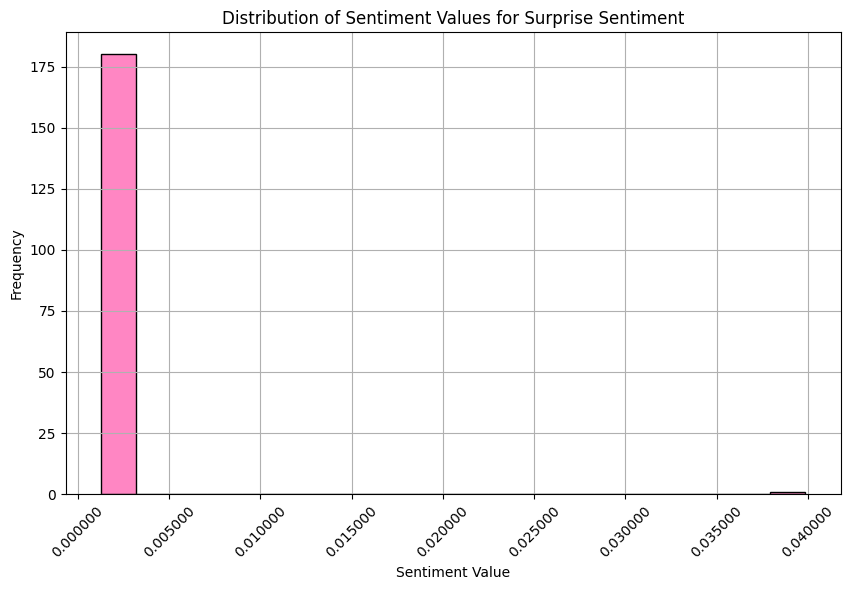

In [ ]:
# Distribution of Sentiment Values for Chosen Sentiment - Matplotlib

import matplotlib.pyplot as plt

# Get the sentiment scores for all words
sentiment_values = [scores[chosen_sentiment] for scores in importance_scores.values()]

# Plot the distribution of sentiment values
plt.figure(figsize=(10, 6))
plt.hist(sentiment_values, bins=20, color=sentiment_colors[chosen_sentiment], edgecolor='black')
plt.title(f'Distribution of Sentiment Values for {chosen_sentiment.capitalize()} Sentiment')
plt.xlabel('Sentiment Value')
plt.ylabel('Frequency')
plt.grid(True)

# Set the format of tick labels along the X axis to display six decimal places
plt.xticks(fontsize=10, rotation=45)
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%.6f'))

plt.show()


In [ ]:
# Distribution of Sentiment Values for Chosen Sentiment - Plotly

import plotly.graph_objects as go

# Get the sentiment scores for all words
sentiment_values = [scores[chosen_sentiment] for scores in importance_scores.values()]

# Create histogram trace with 20 bins
fig = go.Figure(data=[go.Histogram(x=sentiment_values, nbinsx=20, marker_color=sentiment_colors[chosen_sentiment])])

# Update layout
fig.update_layout(
    title=f'Distribution of Sentiment Values for {chosen_sentiment.capitalize()} Sentiment',
    xaxis_title='Sentiment Value',
    yaxis_title='Frequency',
    bargap=0.05,  # Gap between bars
    xaxis=dict(
        tickfont=dict(size=10),  # Font size of tick labels
        tickangle=45,  # Rotate tick labels by 45 degrees
        tickformat=".6f"  # Format tick labels to display six decimal places
    )
)

# Show plot
fig.show()


In [ ]:
# Word by Word Impact on Lyric's Overall Sentiment Scoring

from IPython.display import HTML

# Define sentiment-to-color mapping
sentiment_colors = {
    'joy': '#FE6C40',
    'sadness': '#7CAEFF',
    'fear': '#FFCF32',
    'disgust': '#ABD700',
    'anger': '#A102FE',
    'surprise': '#FF86C3',
    'neutral': '#D3D0D0'
}

# Calculate opacity levels
min_opacity = int(255 * 0.10)
max_opacity = 255
mid_opacity = (max_opacity + min_opacity) // 2

# Generate HTML content for lyrics
html_content = "<div style='font-size:16px;'>"

# Variables to hold max and min scores for each sentiment
max_scores = {sentiment: float('-inf') for sentiment in sentiment_colors}
min_scores = {sentiment: float('inf') for sentiment in sentiment_colors}

for word in long_lyrics.split():
    # Remove punctuation for lookup
    clean_word = word.strip('()[]:,.?!\"')
    # Get the sentiment scores for the clean word
    scores = importance_scores.get(clean_word, {})

    if not scores:
        continue

    for sentiment, score in scores.items():
        # Update max and min scores for the sentiment
        max_scores[sentiment] = max(max_scores[sentiment], score)
        min_scores[sentiment] = min(min_scores[sentiment], score)

    # Find the sentiment with the highest contribution for the word
    chosen_sentiment = max(scores, key=scores.get)
    # Get the sentiment score for the chosen sentiment
    chosen_sentiment_score = scores[chosen_sentiment]

    # Normalize the sentiment score to [0, 1]
    max_score = max_scores[chosen_sentiment]
    min_score = min_scores[chosen_sentiment]
    normalized_score = (chosen_sentiment_score - min_score) / (max_score - min_score) if max_score != min_score else 0.5
    # Calculate opacity proportionately between min and max
    opacity = int(min_opacity + (normalized_score * (max_opacity - min_opacity)))
    # Ensure opacity is within bounds
    opacity = max(min(opacity, 255), 0)
    # Combine color and opacity
    highlight_color_with_opacity = f"{sentiment_colors[chosen_sentiment]}{opacity:02X}"
    background_style = f"background-color:{highlight_color_with_opacity};"
    # Append the word with the corresponding highlighting
    html_content += f"<span style='{background_style}'>{word} </span>"

html_content += "</div>"

# Generate HTML content for legend
legend_html_content = "<div style='font-size:14px; margin-top:10px;'>"
# Sort sentiments by max score in descending order
sorted_sentiments = sorted(max_scores.keys(), key=lambda x: max_scores[x], reverse=True)
for index, sentiment in enumerate(sorted_sentiments, start=1):
    max_score = max_scores[sentiment]
    min_score = min_scores[sentiment]
    # Set sentiment name in bold with a number before it
    legend_html_content += f"<b>{index}. {sentiment.capitalize()}</b><br>"
    # Highlight the maximum value
    max_highlight_color_with_opacity = f"{sentiment_colors[sentiment]}{max_opacity:02X}"
    max_background_style = f"color:black; background-color:{max_highlight_color_with_opacity}; opacity: {max_opacity:.2f}"
    legend_html_content += f"<span style='{max_background_style}'>Maximum value: {max_score:.6f}</span><br>"
    # Highlight the minimum value
    min_highlight_color_with_opacity = f"{sentiment_colors[sentiment]}{min_opacity:02X}"
    min_background_style = f"color:black; background-color:{min_highlight_color_with_opacity}; opacity: {min_opacity:.2f}"
    legend_html_content += f"<span style='{min_background_style}'>Minimum value: {min_score:.6f}</span><br><br>"


legend_html_content += "</div>"



# Display the colored text and legend
display(HTML(html_content))
display(HTML(legend_html_content))
